# Multi Linear Regression:

#### Business Problem:
To prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model

### Importing necessary Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df =pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 5 - Multi Linear Regression/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Performing EDA:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Checking for missing values:

In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Checking for Duplicated Values:

In [7]:
df[df.duplicated()].shape

(0, 5)

In [8]:
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


### Renaming the columns: 

In [9]:
df= df.rename({'R&D Spend' :'RDS', 'Administration':'ADM', 'Marketing Spend':'MKS'}, axis=1)
df.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Correlation analysis:

In [10]:
df.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

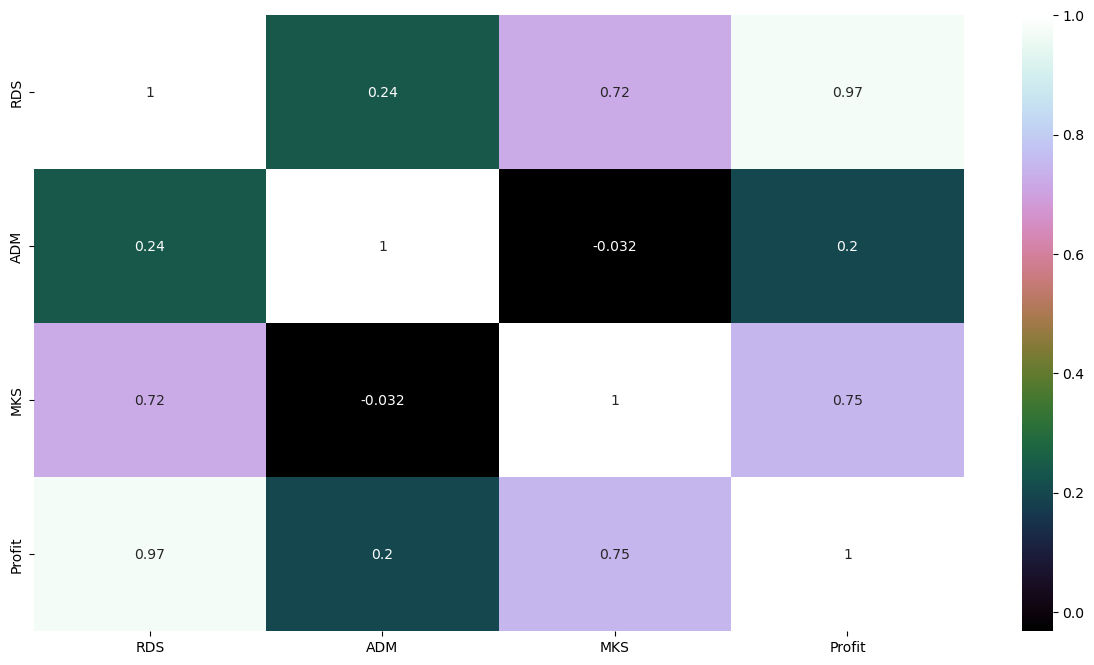

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(), annot=True, cmap='cubehelix')

### Scatterplot between variables along with Histograms:

<Figure size 1400x800 with 0 Axes>

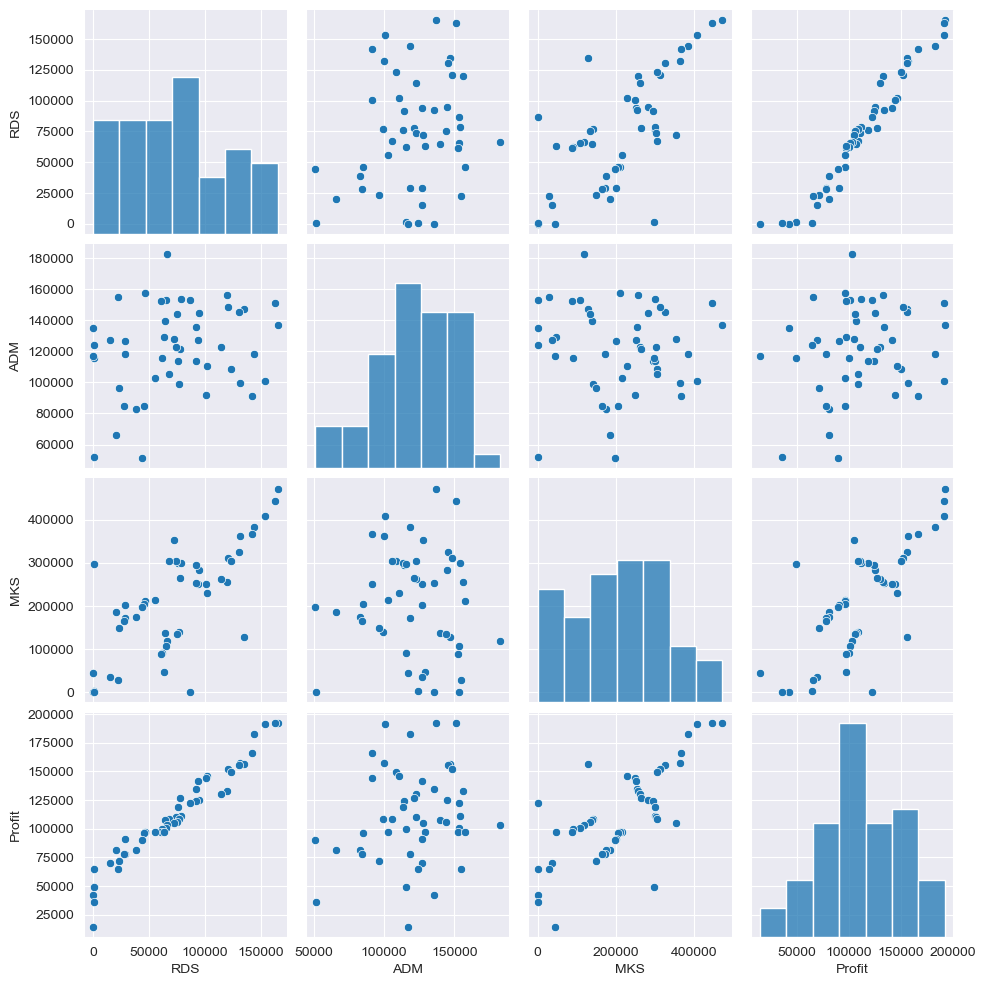

In [12]:
plt.figure(figsize=(14,8))
sns.set_style(style='darkgrid')
sns.pairplot(df)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

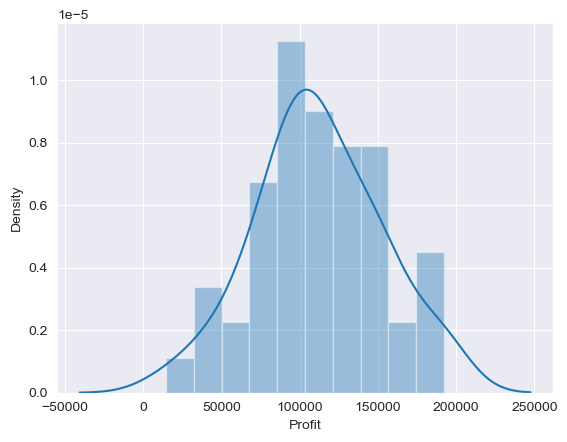

In [13]:
sns.distplot(df['Profit'], bins=10, kde=True)

## Preparing a model: 

### Model without any Transformation:

In [14]:
#Build model

model = smf.ols('Profit~RDS+ADM+MKS', data=df).fit()

In [15]:
#Predicted values for Profit

model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [16]:
#Beta Coefficients

model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        02:52:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [19]:
model.pvalues, model.tvalues

(Intercept    1.057379e-09
 RDS          2.634968e-22
 ADM          6.017551e-01
 MKS          1.047168e-01
 dtype: float64,
 Intercept     7.626218
 RDS          17.846374
 ADM          -0.525507
 MKS           1.655077
 dtype: float64)

#### R-Squared Value for our model without transformation is 95.1%.

**Since, the p-value for Administration (ADM) and Marketing Spend (MKS) is > 0.05, we should build a Simple Linear Regression and Multi Linear Regression models  to see insignificant variables**.

### Simple Linear Regression between Profit & Administration (ADM) Column:

In [20]:
slr_adm = smf.ols('Profit~ADM', data=df).fit()

In [21]:
slr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 09 Aug 2023   Prob (F-statistic):              0.162
Time:                        02:52:08   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 After we build a Simple Linear Regression model , we can see that **Administration has no signifcant P-value**. 

### Simple Linear Regression between Profit & Marketing Spend (MKS) Column:

In [22]:
slr_mks = smf.ols('Profit~MKS', data= df).fit()

In [23]:
slr_mks.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           4.38e-10
Time:                        02:52:08   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKS            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Since, the P-value is less than 0.05, we can say that it is a significant column.**

### Multi Linear Regression model of Adminstration and Marketing Spend together w.r.t Profit:

In [24]:
mlr_admmks = smf.ols('Profit~ADM+MKS', data= df).fit()

In [25]:
mlr_admmks.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           2.50e-10
Time:                        02:52:08   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**When we build the model together, both the columns have significant P-Value.**

## Calculating VIF (Variance Inflation Factor)

In [26]:
rsq_rds = smf.ols('RDS~ADM+MKS', data = df).fit().rsquared
vif_rds = 1/(1-rsq_rds)
vif_rds

2.4689030699947017

In [27]:
rsq_adm = smf.ols('ADM~RDS+MKS', data = df).fit().rsquared
vif_adm = 1/(1-rsq_adm)
vif_adm

1.1750910070550455

In [28]:
rsq_mks = smf.ols('MKS~RDS+ADM', data= df).fit().rsquared
vif_mks = 1/(1-rsq_mks)
vif_mks

2.326773290530878

In [29]:
#Storing VIF values in a dataframe

d1={'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds, vif_adm, vif_mks]}
VIF_frame=pd.DataFrame(d1)
VIF_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


Since, **no value of VIF is greater than 10** , we can say that the **points are moderately correlated** and there is **no collinearity problem**. So, we shall **consider all columns** for **building the model**

## Test for Normality of Residuals (Q-Q Plot):

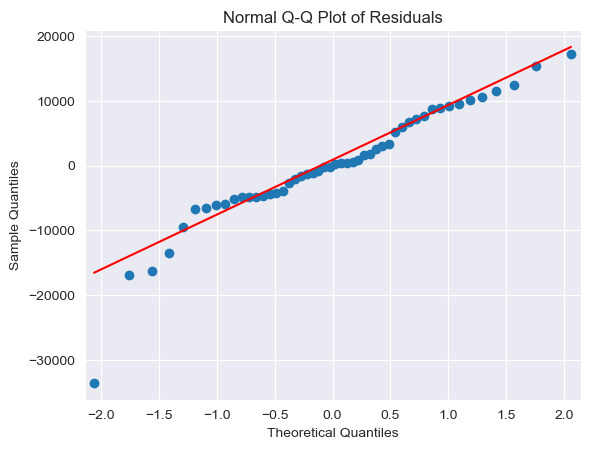

In [30]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') # line=45 to draw the diagonal line
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [31]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

<AxesSubplot:>

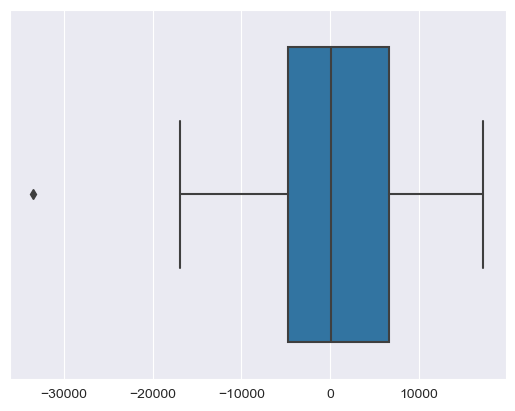

In [32]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Count'>

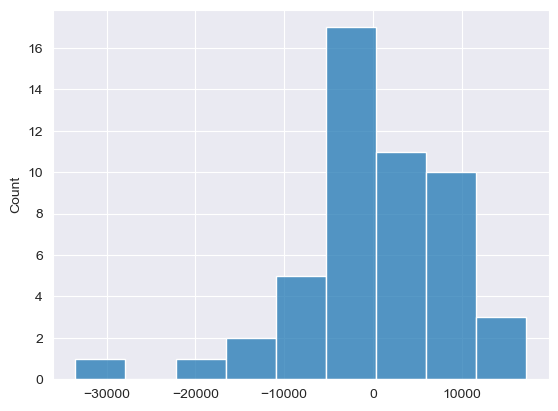

In [33]:
sns.histplot(model.resid)

<AxesSubplot:ylabel='Density'>

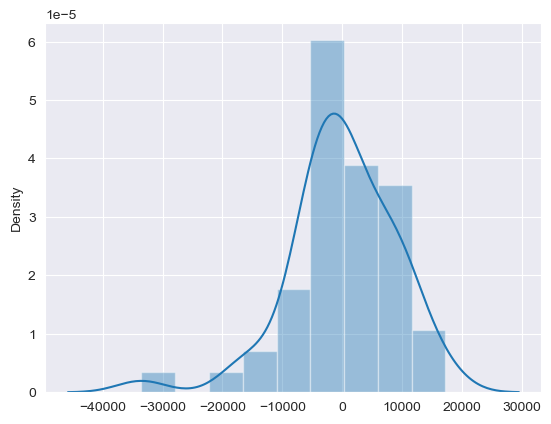

In [34]:
sns.distplot(model.resid)

## Residual Plot For Homoscedasticity:

In [35]:
def get_standardised_values(vals):
    return (vals-vals.mean())/vals.std()

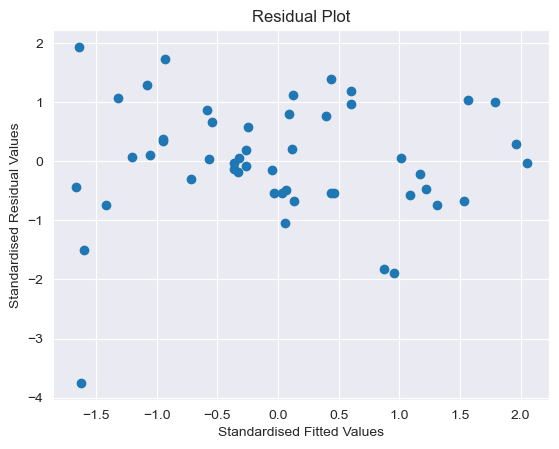

In [36]:
plt.scatter(get_standardised_values(model.fittedvalues), 
            get_standardised_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardised Fitted Values')
plt.ylabel('Standardised Residual Values')
plt.show()

## Residual vs Regressors:

eval_env: 1


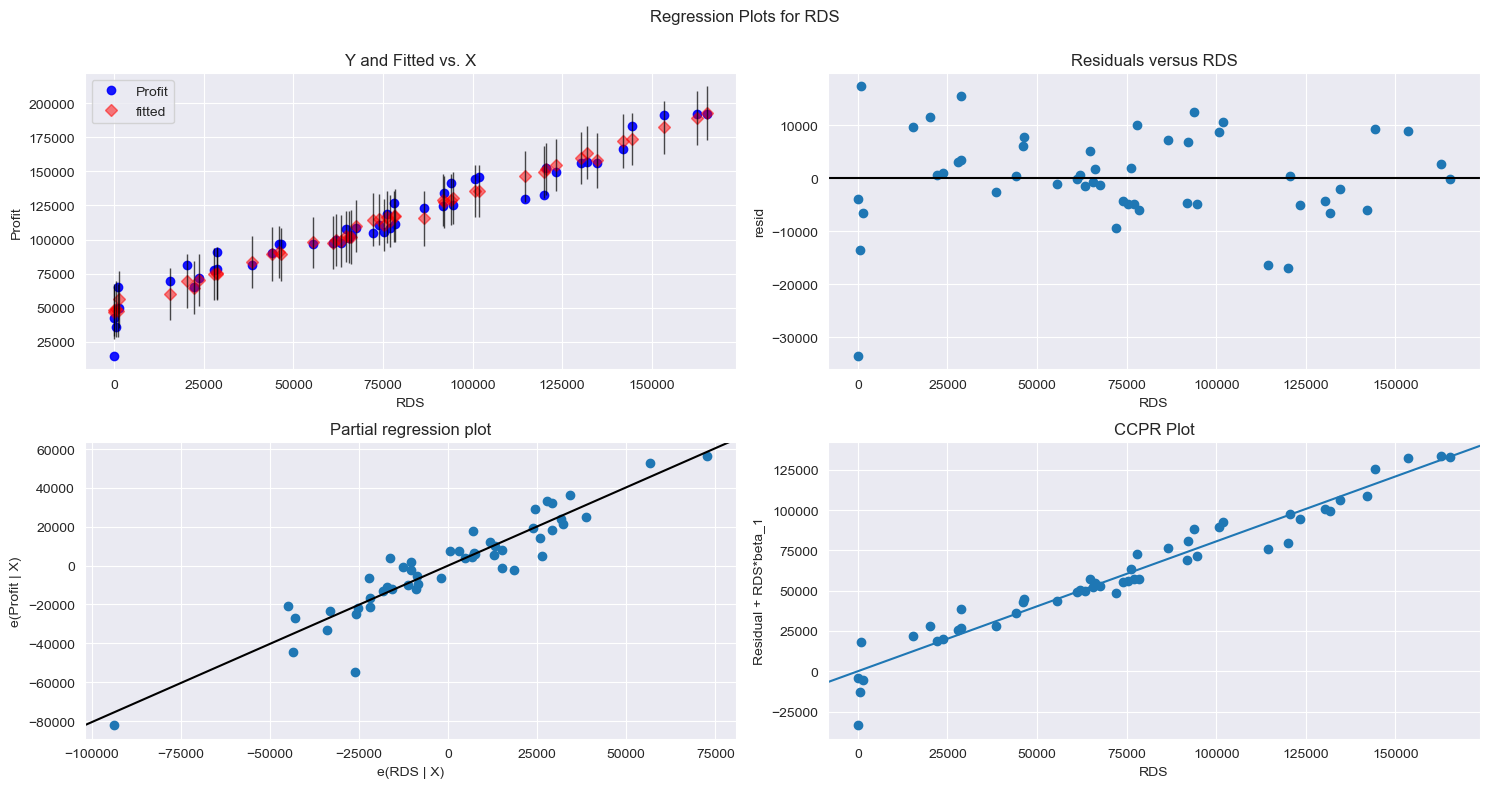

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


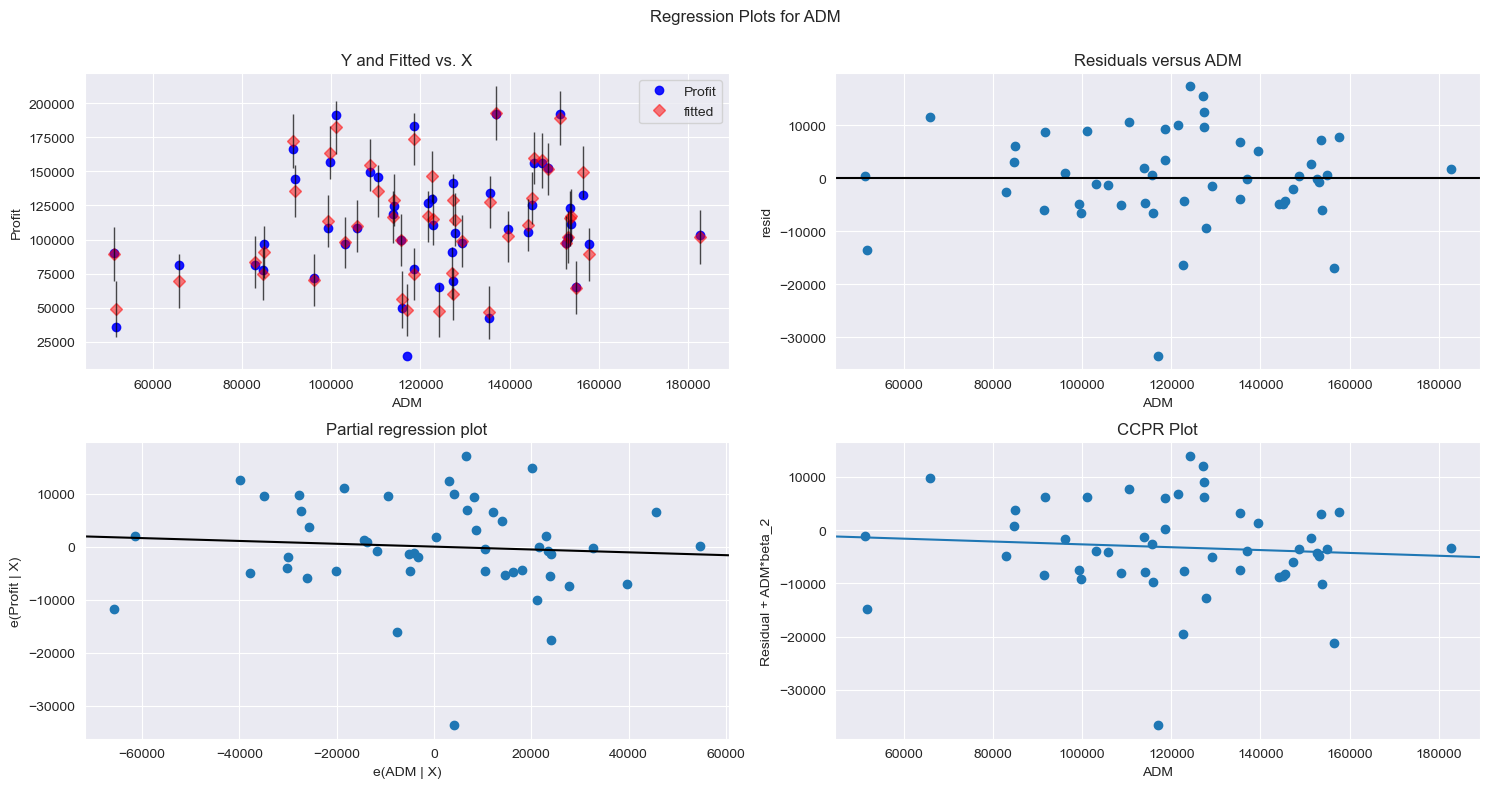

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

eval_env: 1


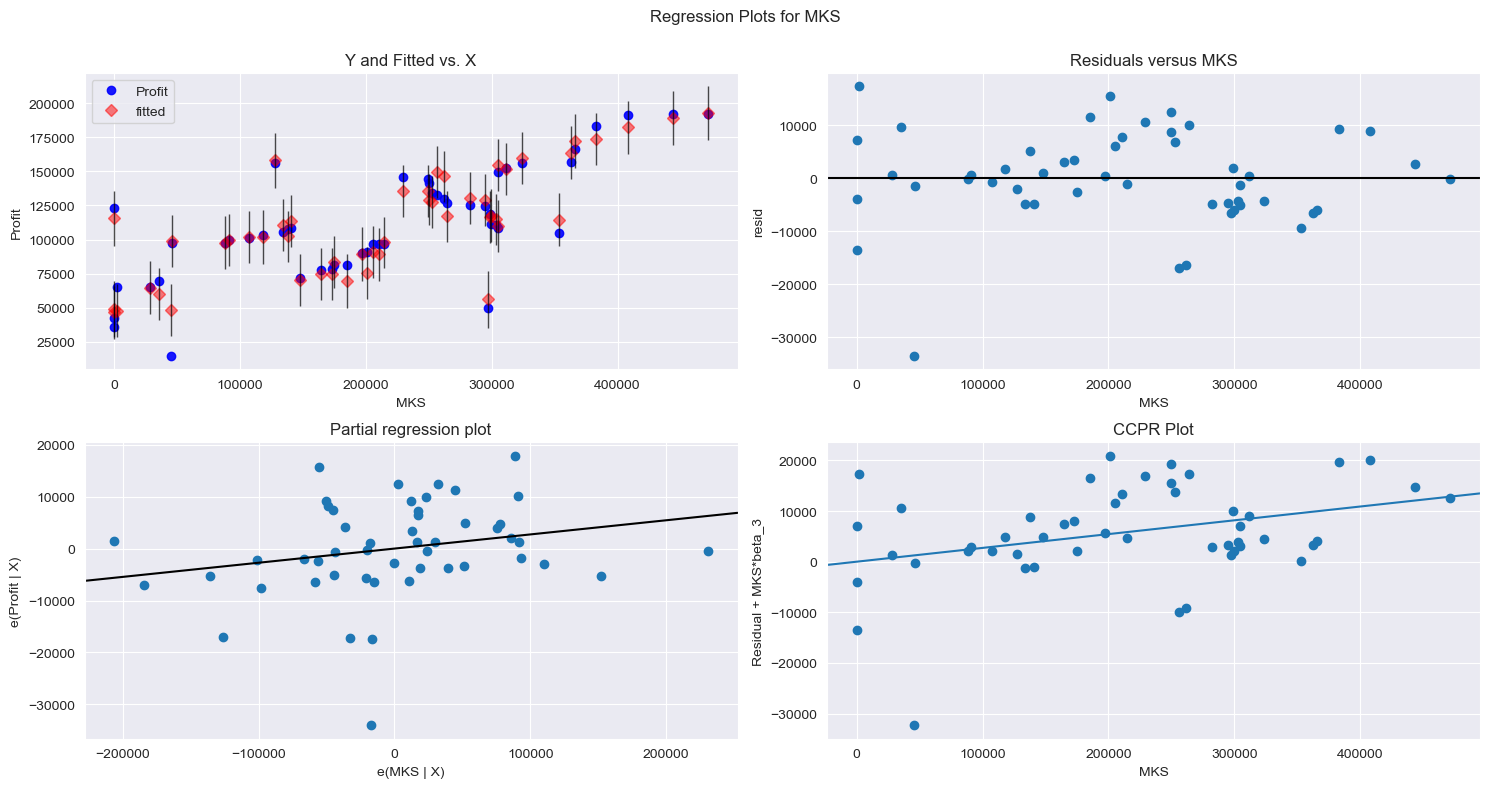

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

eval_env: 1


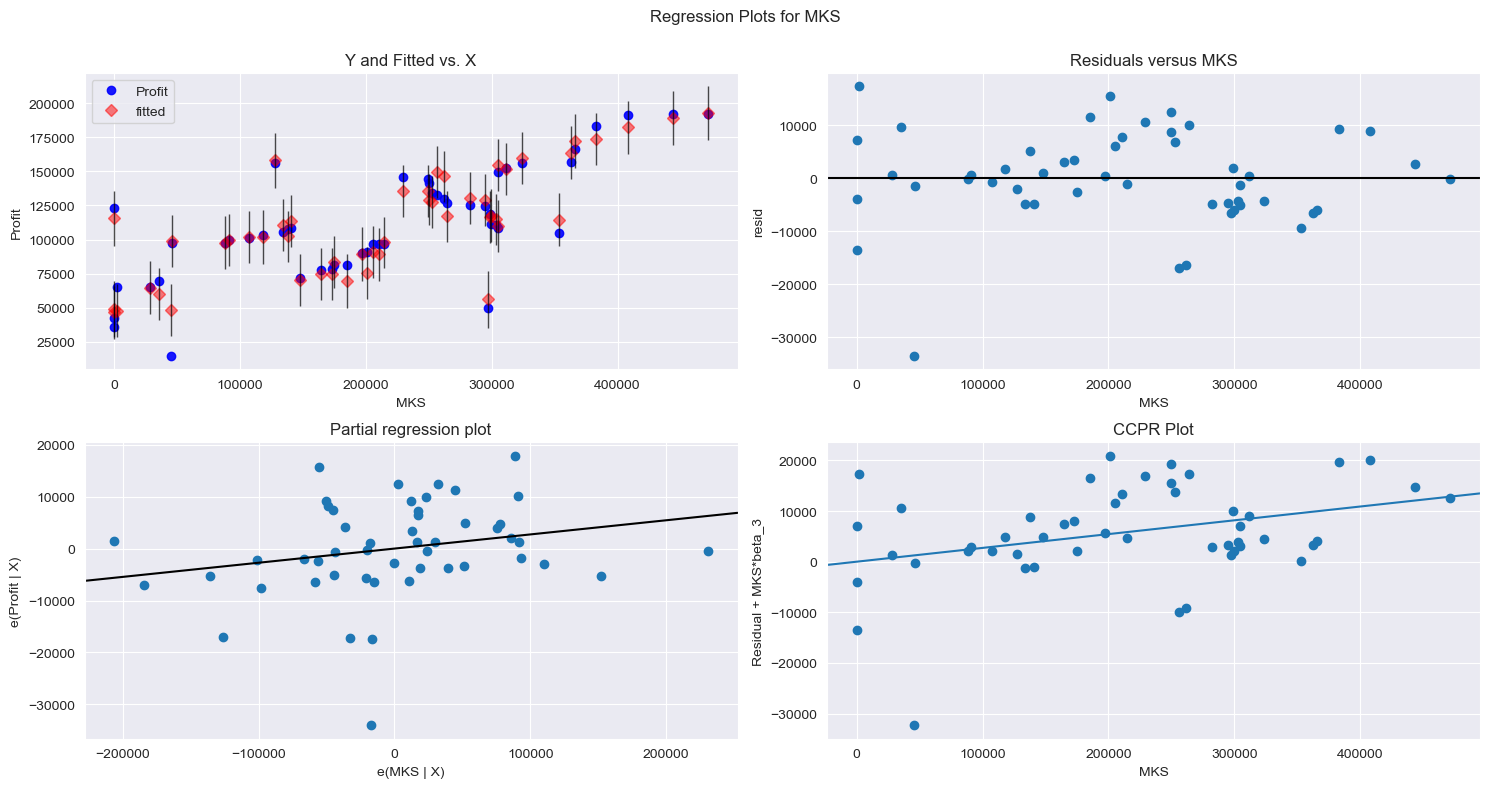

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

## Cook's Distance:

In [41]:
df.shape

(50, 5)

In [42]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

In [43]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [44]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(c)

[3.22e-05 3.28e-03 3.24e-02 2.17e-02 1.45e-02 1.17e-02 2.92e-03 3.57e-03
 4.04e-05 4.87e-03 1.51e-02 1.64e-02 1.16e-02 4.01e-03 6.13e-02 3.40e-02
 8.34e-03 3.31e-03 2.17e-03 4.07e-02 4.25e-04 1.10e-02 2.92e-03 2.76e-04
 5.05e-03 3.00e-03 3.42e-03 2.98e-02 1.32e-03 1.26e-04 4.19e-05 9.27e-06
 7.09e-04 1.28e-04 2.10e-02 6.70e-03 5.55e-02 6.55e-05 5.62e-02 1.54e-03
 1.85e-03 1.98e-03 1.36e-04 2.06e-02 1.23e-04 9.03e-02 5.45e-02 5.34e-03
 1.91e-01 2.88e-01]


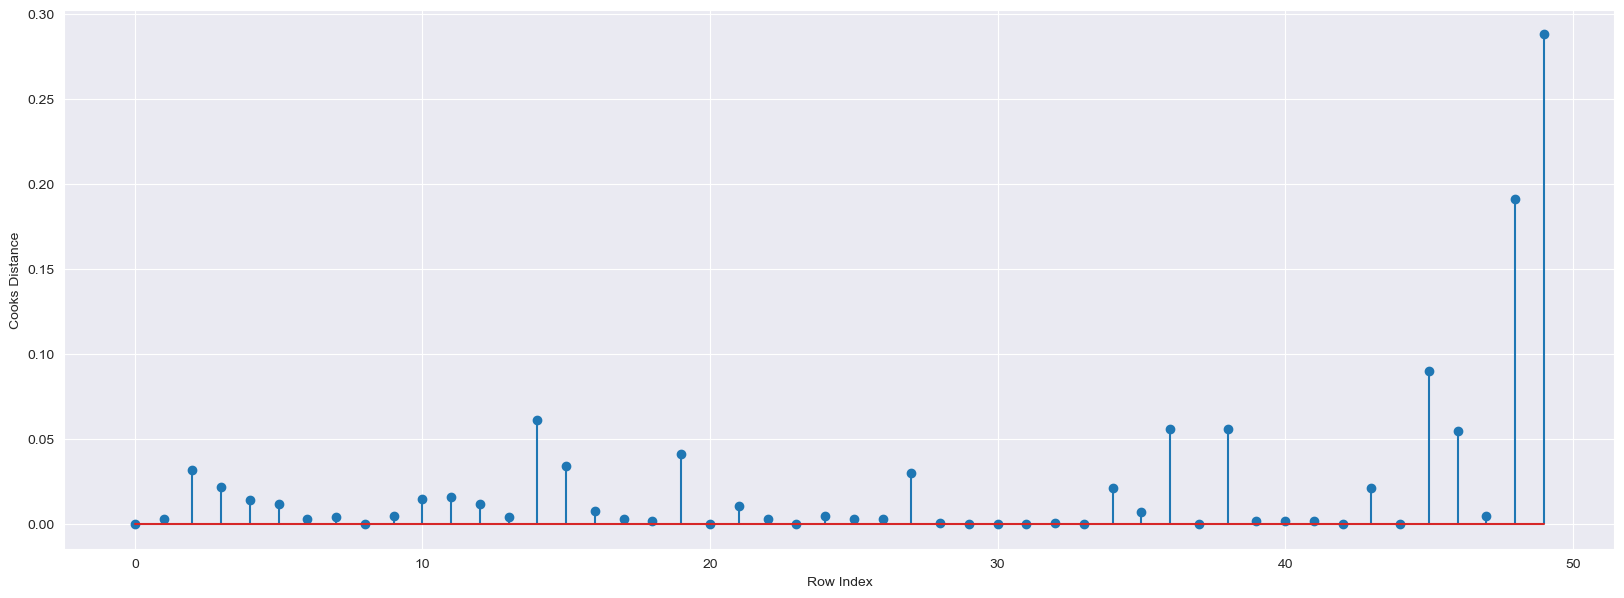

In [45]:
#Plot the influencers values using stem plot

fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

## High Influence Points

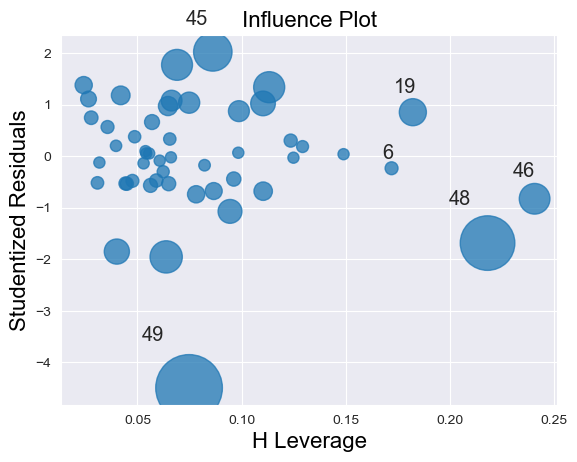

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [48]:
df.shape

(50, 5)

In [49]:
#k = number of variables(columns)
#n = number of observations(rows)

k=4
n=50

leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [50]:
df[df.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [51]:
df.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Improving the Model:

In [52]:
df1 = df.drop(df.index[49], axis=0).reset_index()

In [53]:
df1

,index,RDS,ADM,MKS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
df.shape

(50, 5)

In [55]:
df1.shape

(49, 6)

In [56]:
df1=df1.drop(['index'],axis=1)

In [57]:
df1

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Fitting Final Model:

In [58]:
Final_model = smf.ols('Profit~RDS+ADM+MKS', data=df1).fit()

In [59]:
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        02:52:16   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKS            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Thus, the **Accuracy of the model** has **improved** to **96.1%** 

### New Data for Prediction:

In [60]:
new_data = pd.DataFrame({'RDS':75000, 'ADM':127684.55, 'MKS':259893.44}, index=[1])
new_data

,RDS,ADM,MKS
1,75000,127684.55,259893.44


In [61]:
# Manual Prediction

Final_model.predict(new_data)

1    114830.861697
dtype: float64

In [62]:
# Automatic Prediction

pred_y = Final_model.predict(df1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [63]:
# Creating a table for R-Squared Values:

d2 = {'Prepared_models':['Model','Final Model'],'Rsquared':[round(model.rsquared,4)*100,round(Final_model.rsquared,4)*100]}
table = pd.DataFrame(d2)
table

,Prepared_models,Rsquared
0,Model,95.07
1,Final Model,96.13


Therefore, we can see that **after deleting the outlier** from the original data, the **new data model** that we are left with **gives** us an **accuracy** of **96.13%**